# Equation of state (EOS)

In [1]:
from workgraph_collections.ase.qe.eos import eos_workgraph

wg = eos_workgraph()
wg

NodeGraphWidget(settings={'minimap': True}, style={'width': '90%', 'height': '600px'}, value={'name': 'eos', '…

## Prepare the input files


In [2]:
from ase.build import bulk
from ase import Atoms
from aiida import load_profile, orm

load_profile()

# create input structure node
atoms = bulk("Si")

metadata = {
    "options": {
        'prepend_text' : """
# module use unstable;
# module load gcc/11.2.0 openmpi/4.1.3_slurm
# module load qe/7.0 anaconda
# conda activate aiida
export OMP_NUM_THREADS=1
        """,
        "resources": {
            "num_machines": 1,
            "num_mpiprocs_per_machine": 1,
        },
    }
}
pseudopotentials = {"Si": "Si.pbe-nl-rrkjus_psl.1.0.0.UPF"}
# pseudo_dir = "/psi/home/wang_x3/pseudos"
pseudo_dir = "/home/xing/data/ase/espresso_pseudo"
input_data = {
    "system": {"ecutwfc": 30, "ecutrho": 240,
               "occupations": "smearing",
                "degauss": 0.01,
                "smearing": "cold",},
}
# pw_binary = "mpirun -n 1 /opt/psi/MPI/qe/7.0/openmpi/4.1.3_slurm/gcc/11.2.0/bin/pw.x"
pw_binary = "mpirun -n 1 pw.x"
#------------------------- Set the inputs -------------------------
wg = eos_workgraph()
wg.nodes["scale_atoms"].set({"atoms": atoms,
                             "scales": [0.98, 0.99, 1.0, 1.01, 1.02],
                             "computer": "localhost",
                             "metadata": metadata,
                             })
wg.nodes["all_scf"].set({"scf_inputs": {
                                        "pseudopotentials": pseudopotentials,
                                        "pseudo_dir": pseudo_dir,
                                        "input_data": input_data,
                                        "kpts": [5, 5, 5],
                                        "computer": "localhost",
                                        "metadata": metadata
                                        }
                          })
wg.nodes["fit_eos"].set({"computer": "localhost",
                         "metadata": metadata
                        })
#------------------------- Submit the calculation -------------------
wg.submit(wait=True, timeout=200)
#------------------------- Print the results -----------------------
print(wg.nodes["fit_eos"].outputs["result"].value)


WorkGraph node created, PK: 46089
uuid: 6ce4244d-85ee-4df7-8a2f-8c9154e105ad (pk: 46178)


Generate node graph

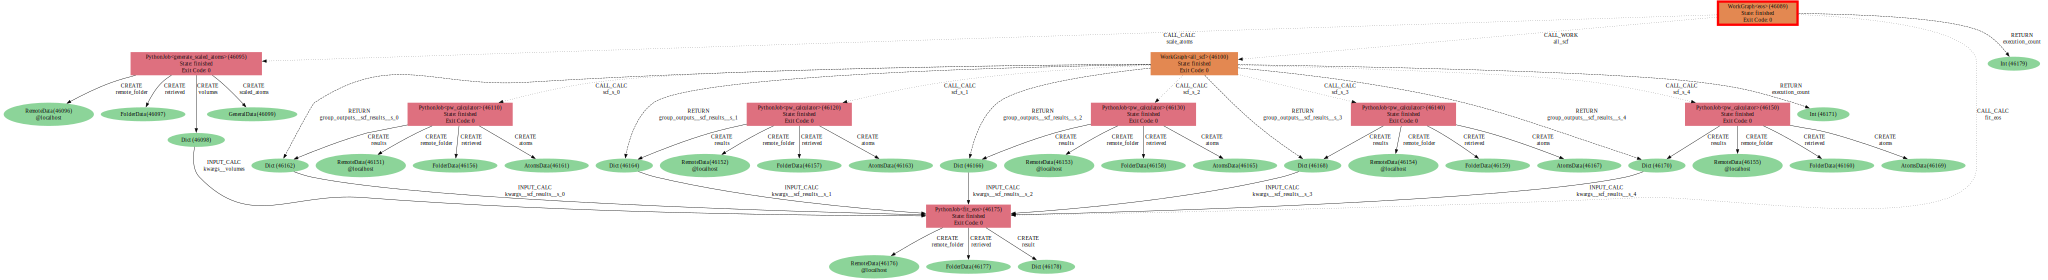

In [3]:
#------------------------- Generate node graph -------------------
from aiida_workgraph.utils import generate_node_graph
generate_node_graph(wg.pk)